# Project B - Clustering

What pre-processing was required on datasets (D2_mar.csv and D2_apr.csv) before building the clustering model?
Build a clustering model to profile the characteristics of countries. Answer the following for both datasets (D2_mar.csv and D2_apr.csv):
What clustering algorithm have you used?
List the attributes used in this analysis.
What is the optimal number of clusters identified? How did you reach this optimal number?
Did you normalise the variables? What was its effect on the model – Does the variable normalisation process enable a better clustering solution?
For the model with the optimal number of clusters, answer the following for both datasets (D2_mar.csv and D2_apr.csv).
Visualise the clusters using ‘pairplot’ and interpret the visualisation.
Characterise the nature of each cluster by giving it a descriptive label and a brief description. Hint: use cluster distribution.
Using the best setting (e.g., variable normalisations, optimal K, etc) obtained in the previous models, profile clusters in both datasets. Compare the results of clusters for D2_mar.csv and D2_apr.csv. How did the behaviour of countries change from March to April?


**What pre-processing was required on datasets (D2_mar.csv and D2_apr.csv) before building the clustering model?**

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# load the bank transaction dataset
D2_mar = pd.read_csv('D2_mar.csv')

# info
print(D2_mar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    object 
dtypes: float64(8), object(1)
memory usage: 7.3+ KB
None


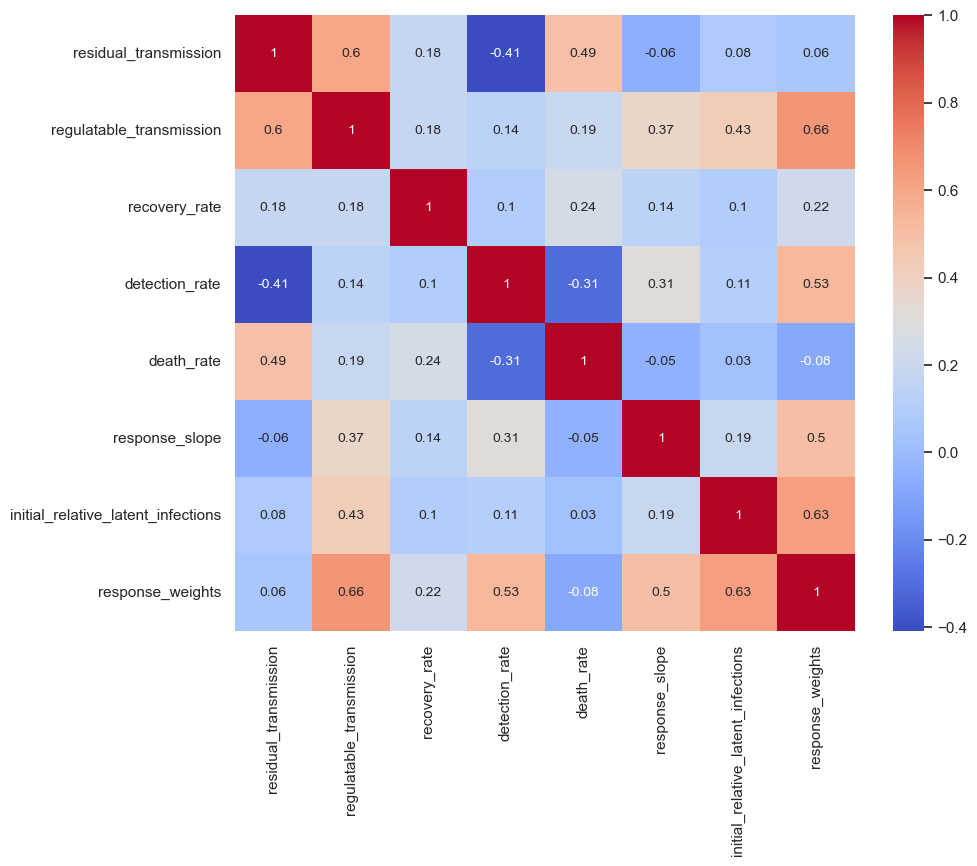

In [7]:
correlation_matrix = D2_mar.corr()
rounded_correlation_matrix = correlation_matrix.round(2)
plt.figure(figsize=(10, 8))
annot_kws = {"size": 10}  # Adjust the size as needed
sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', annot_kws=annot_kws)
plt.show()

- Data is consistent
- There is no missing data
- No redundant data
- For cluster analysis, variables are normalized anyway, so no need to explore skews
- No colinearity present between variables

In [8]:
import pandas as pd

# load the bank transaction dataset
D2_apr = pd.read_csv('D2_apr.csv')

# info
print(D2_apr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    object 
dtypes: float64(8), object(1)
memory usage: 8.4+ KB
None


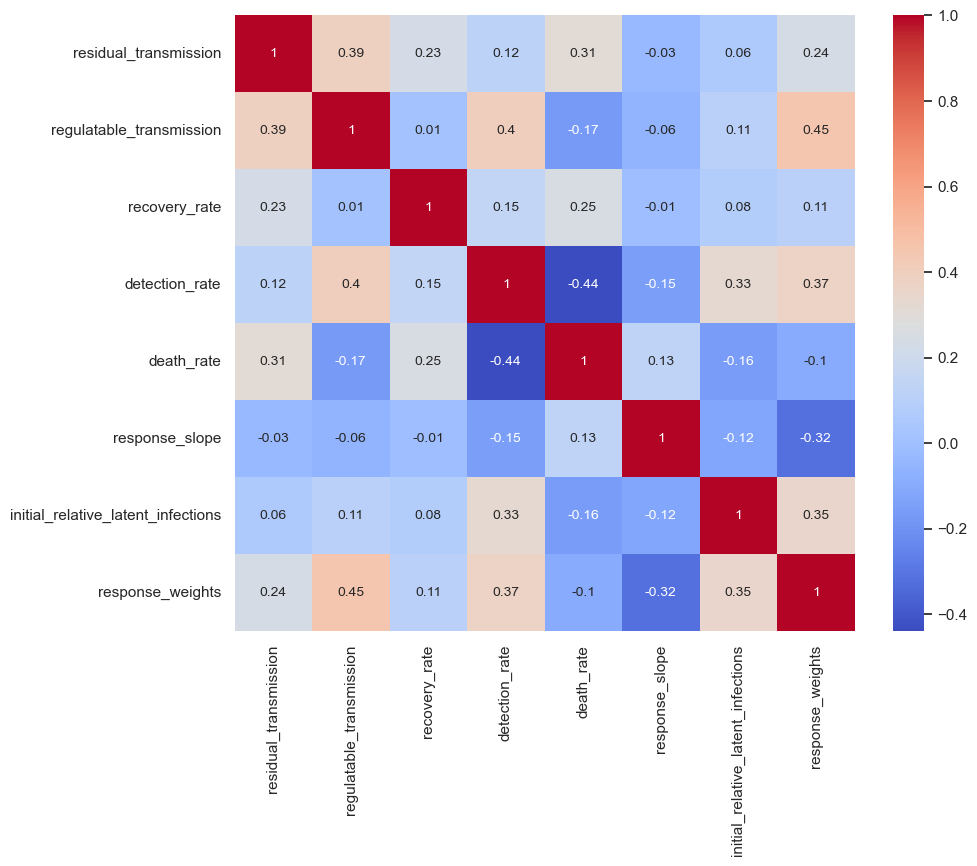

In [9]:
correlation_matrix = D2_apr.corr()
rounded_correlation_matrix = correlation_matrix.round(2)
plt.figure(figsize=(10, 8))
annot_kws = {"size": 10}  # Adjust the size as needed
sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', annot_kws=annot_kws)
plt.show()

- Data is consistent
- There is no missing data
- No redundant data
- For cluster analysis, variables are normalized anyway, so no need to explore skews
- No colinearity present between variables

**Build a clustering model to profile the characteristics of countries**

In [10]:
Countries = pd.concat([D2_mar['Country'], D2_apr['Country']], axis=0, ignore_index=True)
Countries = pd.DataFrame({'Combined Countries': Countries})
Countries.info()


unique_countries = Countries['Combined Countries'].unique()
sorted_countries = sorted(unique_countries)
print(sorted_countries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Combined Countries  220 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB
['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BOL', 'BRA', 'BRN', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV

In [11]:
# Use factorize to map each unique value to a number
mapping, labels = pd.factorize(sorted_countries,sort = True)

In [12]:
# Create a dictionary to map country names to numbers (adding 1 to each label value)
country_mapping = dict(zip(labels, [num + 1 for num in mapping]))

D2_mar['Country'] = D2_mar['Country'].replace(country_mapping)
D2_apr['Country'] = D2_apr['Country'].replace(country_mapping)

In [14]:
from sklearn.preprocessing import StandardScaler

# convert df to matrix
X_mar = D2_mar.to_numpy()
X_apr = D2_apr.to_numpy()

# scaling
scaler = StandardScaler()
X_mar = scaler.fit_transform(X_mar)
X_apr = scaler.fit_transform(X_apr)

In [16]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

**D2_mar**

In [17]:
# Set a specific seed for reproducibility
rs = 42

In [18]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 18, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X_mar, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

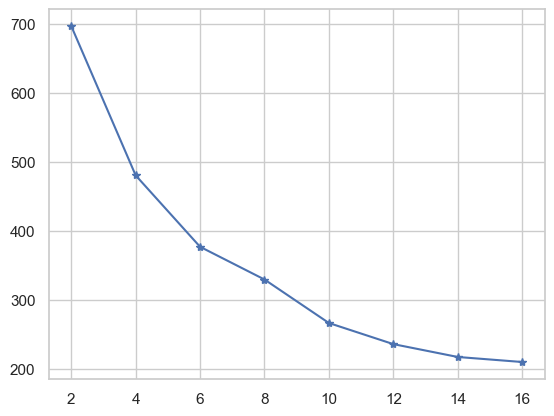

In [19]:
# plot the cost vs K values
plt.plot(range(2,18,2), cost_vals, marker='*')
plt.show()

**D2_apr**

In [20]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 18, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X_apr, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

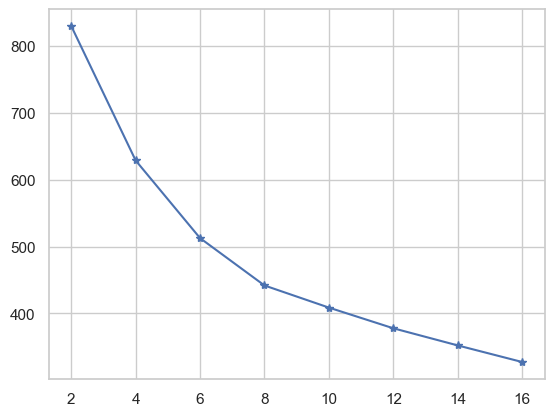

In [21]:
# plot the cost vs K values
plt.plot(range(2,18,2), cost_vals, marker='*')
plt.show()

By applying the elbow method on the above plot, the optimal value for $K$ lies between 4 and 6. The silhouette score has to be calculated to find the optimal value.

Due to the presences of mixed data types (numeric and categorical), the calculation of silhouette score for `Kprototypes` is different form `KMeans`. For `Kprototypes`, two silhouette scores representing numeric variables and categorical variables should be calculated seperately and average should be calculated. We will first see how to calculate this value for $K = 4$.

In [23]:
X_mar_num = [[row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in X_mar] # Variables of X with numeric datatype
X_apr_num = [[row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in X_apr] # Variables of X with numeric datatype

X_mar_cat = [[row[8]] for row in X_mar] # variables of X with categorical datatype
X_apr_cat = [[row[8]] for row in X_apr] # variables of X with categorical datatype

**D2_mar**

In [24]:
from sklearn.metrics import silhouette_score

model = clusters[0] # cluster[0] holds the K-prtotypes model with K=2
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=2: " + str(silScore))

model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

model = clusters[2] # cluster[2] holds the K-prtotypes model with K=6
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6: " + str(silScore))

model = clusters[3] # cluster[3] holds the K-prtotypes model with K=8
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=8: " + str(silScore))

model = clusters[4] # cluster[4] holds the K-prtotypes model with K=10
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=10: " + str(silScore))

The avg silhouette score for k=2: 0.3679905419921004
The avg silhouette score for k=4: 0.14819416060330495
The avg silhouette score for k=6: 0.010972233916866457
The avg silhouette score for k=8: 0.01633542211102731
The avg silhouette score for k=10: 0.024585893364026053


So for **D2_mar** k = 10 is the best option

**D2_apr**

In [25]:
from sklearn.metrics import silhouette_score

model = clusters[0] # cluster[0] holds the K-prtotypes model with K=2
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=2: " + str(silScore))

model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

model = clusters[2] # cluster[2] holds the K-prtotypes model with K=6
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6: " + str(silScore))

model = clusters[3] # cluster[3] holds the K-prtotypes model with K=8
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=8: " + str(silScore))

model = clusters[4] # cluster[4] holds the K-prtotypes model with K=10
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=10: " + str(silScore))

The avg silhouette score for k=2: 0.2620817625459884
The avg silhouette score for k=4: 0.02214522389473484
The avg silhouette score for k=6: 0.021391480309120643
The avg silhouette score for k=8: 0.025228220601142277
The avg silhouette score for k=10: 0.02219987361134436


So for **D2_apr** k = 8 is the best option

Cluster membership
9    32
4    31
5    11
6     9
7     7
1     6
2     3
0     1
3     1
8     1
Name: Cluster_ID, dtype: int64


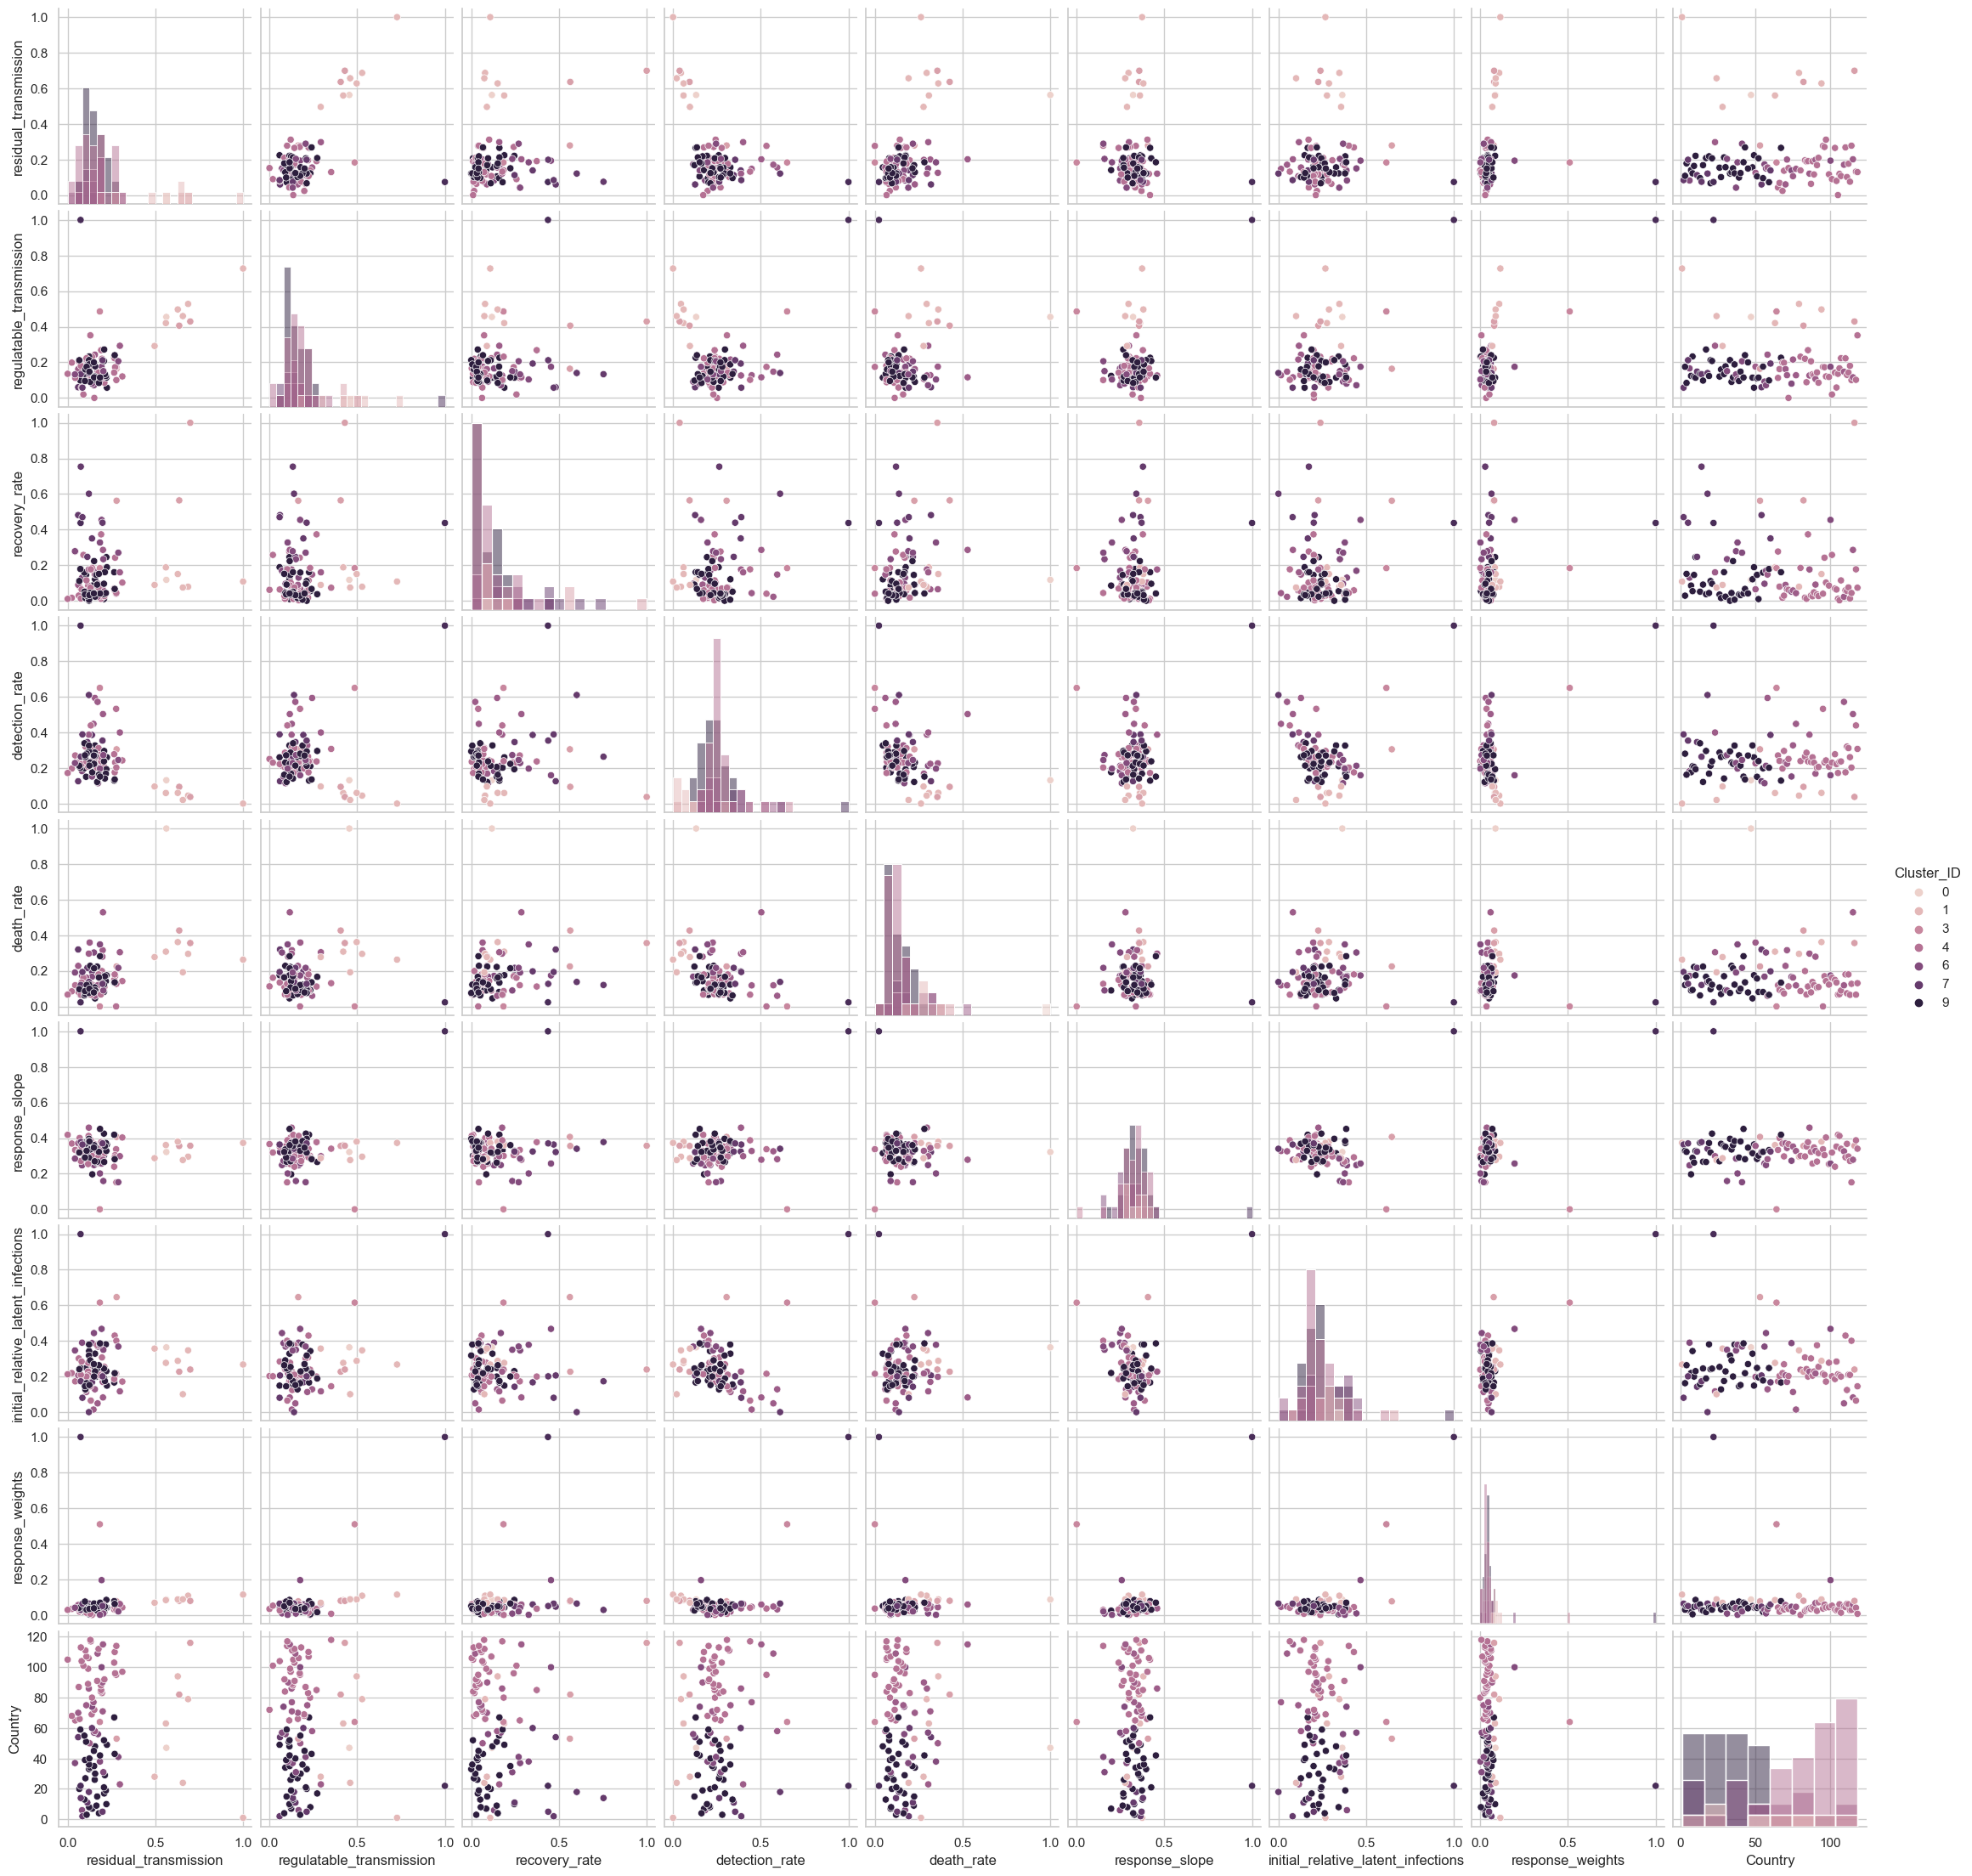

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

model = clusters[4]
y = model.fit_predict(X_mar, categorical = [1])
D2_mar['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(D2_mar['Cluster_ID'].value_counts())

# pairplot the cluster distribution

cluster_g = sns.pairplot(D2_mar, hue='Cluster_ID', diag_kind='hist')
plt.show()

Cluster membership
0    39
6    32
4    15
1    13
5     8
3     5
7     5
2     1
Name: Cluster_ID, dtype: int64


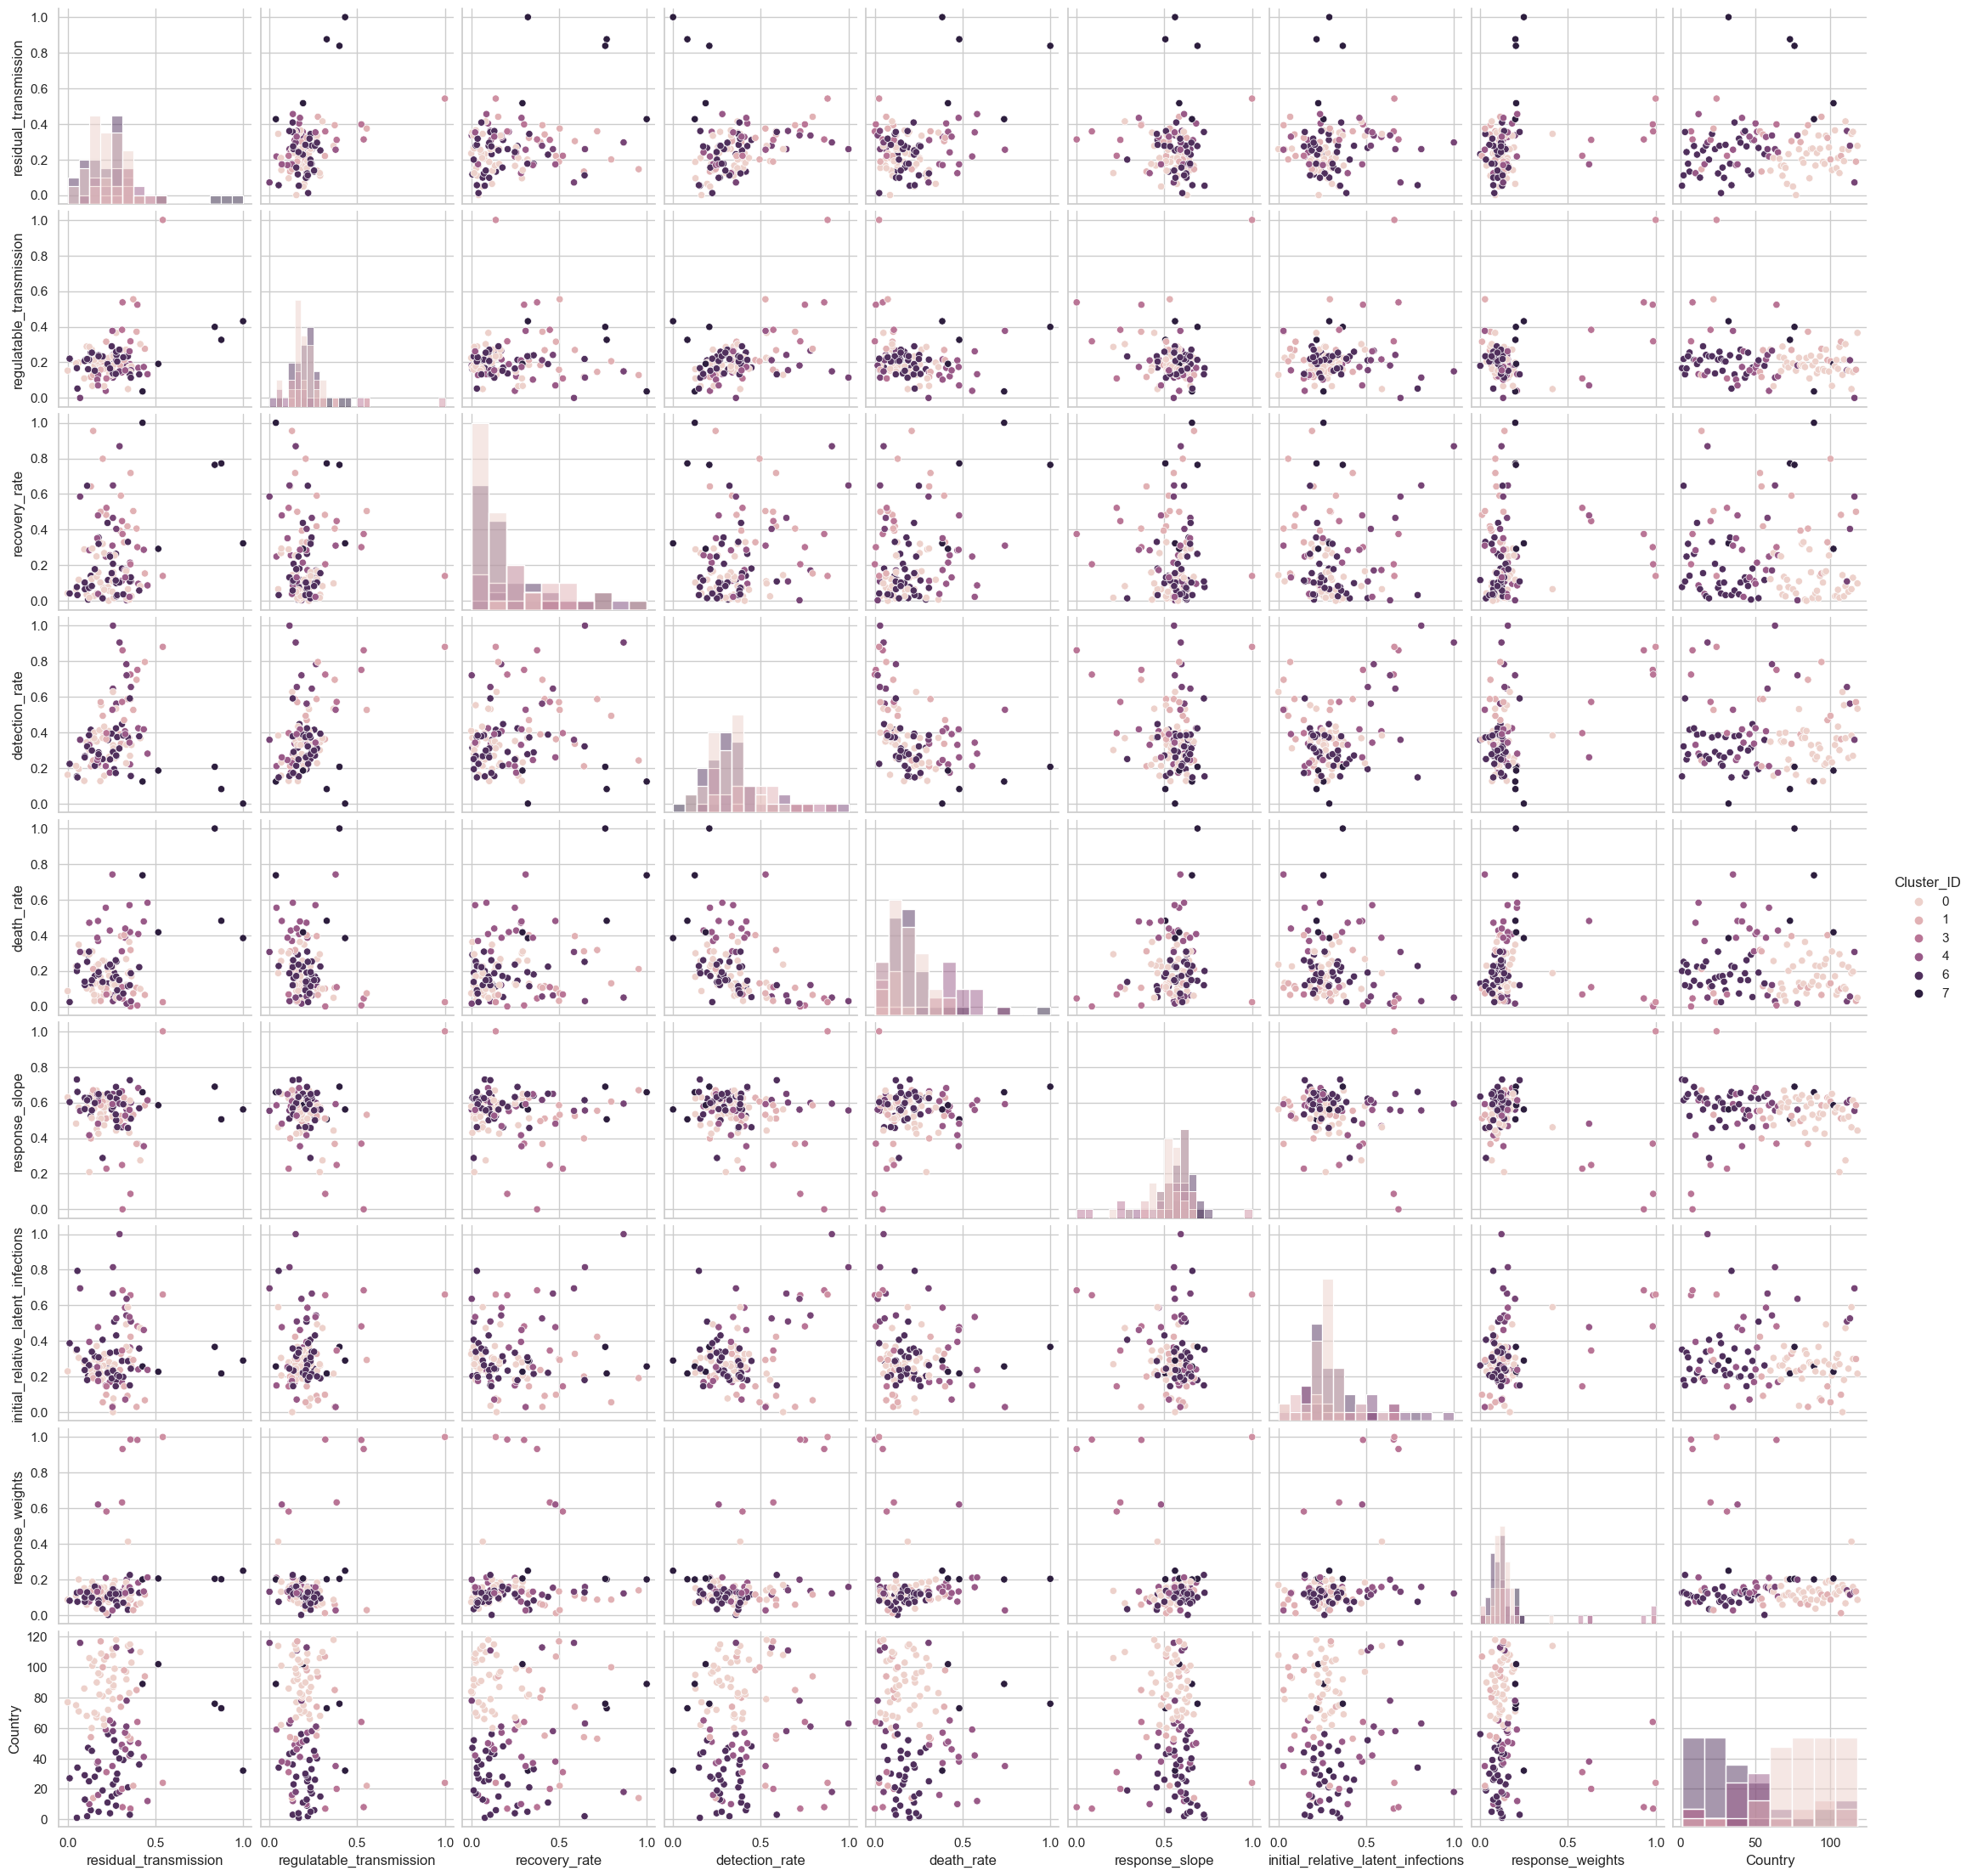

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

model = clusters[3]
y = model.fit_predict(X_apr, categorical = [1])
D2_apr['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(D2_apr['Cluster_ID'].value_counts())

# pairplot the cluster distribution

cluster_g = sns.pairplot(D2_apr, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = D2_mar.columns.tolist()
n_bins = 20

clusters_to_inspect = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # create subplots
    fig, ax = plt.subplots(nrows=len(cols), figsize=(10, 2*len(cols)))
    fig.suptitle("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(D2_mar[col]), max(D2_mar[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(D2_mar[D2_mar['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde=False, label='Cluster {}'.format(cluster))
        # plot the normal distribution with a black line
        sns.distplot(D2_mar[col], bins=bins, ax=ax[j], hist=False, color="k", label='Overall')
        ax[j].legend()
        ax[j].set_title("Variable {}".format(col))
    
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = D2_apr.columns.tolist()
n_bins = 20

clusters_to_inspect = [0, 1, 2, 3, 4, 5, 6, 7]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # create subplots
    fig, ax = plt.subplots(nrows=len(cols), figsize=(8, 2*len(cols)))
    fig.suptitle("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(D2_apr[col]), max(D2_apr[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(D2_apr[D2_apr['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde=False, label='Cluster {}'.format(cluster))
        # plot the normal distribution with a black line
        sns.distplot(D2_apr[col], bins=bins, ax=ax[j], hist=False, color="k", label='Overall')
        ax[j].legend()
        ax[j].set_title("Variable {}".format(col))
    
    plt.show()


In [ ]:
D2_mar

In [ ]:
Country = ['Afghanistan', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
                'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Bolivia', 'Brazil', 'Brunei', 'Canada', 'Switzerland',
                'Chile', 'China', 'Ivory Coast', 'Cameroon', 'Democratic Republic of the Congo', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
                'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
                'Ghana', 'Guinea', 'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel',
                'Italy', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait', 'Lebanon', 'Sri Lanka', 'Lithuania',
                'Luxembourg', 'Latvia', 'Morocco', 'Moldova', 'Madagascar', 'Mexico', 'North Macedonia', 'Mali', 'Malta', 'Montenegro', 'Mauritius', 'Malaysia',
                'Niger', 'Nigeria', 'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Paraguay',
                'Palestine', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Singapore', 'El Salvador', 'Serbia', 'Slovakia', 'Slovenia',
                'Sweden', 'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Taiwan', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan', 'Venezuela', 'Vietnam',
                'South Africa']

In [ ]:
Abbreviation = ['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BOL', 'BRA', 'BRN', 'CAN', 'CHE',
                     'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
                     'GBR', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
                     'KHM', 'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MUS', 'MYS', 'NER', 'NGA', 'NLD',
                     'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVK',
                     'SVN', 'SWE', 'THA', 'TTO', 'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM', 'ZAF']
# Corresponding continents
continents = ['Asia',
'Europe',
'Europe',
'Asia',
'South America',
'Asia',
'Oceania',
'Europe',
'Asia',
'Europe',
'Africa',
'Asia',
'Europe',
'Asia',
'Europe',
'South America',
'South America',
'Asia',
'North America',
'Europe',
'South America',
'Asia',
'Africa',
'Africa',
'Africa',
'South America',
'Central America',
'Central America',
'Europe',
'Europe',
'Europe',
'Africa',
'Europe',
'Central America',
'Africa',
'South America',
'Africa',
'Europe',
'Europe',
'Europe',
'Europe',
'Europe',
'Africa',
'Africa',
'Europe',
'Central America',
'Central America',
'Europe',
'Europe',
'Asia',
'Asia',
'Europe',
'Asia',
'Asia',
'Europe',
'Asia',
'Europe',
'Asia',
'Asia',
'Asia',
'Africa',
'Asia',
'Asia',
'Asia',
'Asia',
'Asia',
'Asia',
'Europe',
'Europe',
'Europe',
'Africa',
'Europe',
'Africa',
'North America',
'Europe',
'Africa',
'Europe',
'Europe',
'Africa',
'Asia',
'Africa',
'Africa',
'Europe',
'Europe',
'Oceania',
'Asia',
'Asia',
'Central America',
'South America',
'Asia',
'Europe',
'Europe',
'South America',
'Asia',
'Asia',
'Europe',
'Europe',
'Africa',
'Asia',
'Africa',
'Asia',
'Central America',
'Europe',
'Europe',
'Europe',
'Europe',
'Asia',
'Central America',
'Africa',
'Europe/Asia (Transcontinental)',
'Asia',
'Europe',
'South America',
'North America',
'Asia',
'South America',
'Asia',
'Africa']


In [ ]:
mapping

In [ ]:
labels

In [ ]:
len(Country)

In [ ]:
len(continents)

In [ ]:
# Create pandas Series from the lists
numbers_series = pd.Series(mapping, name='Country')
countries_series = pd.Series(Country, name='Name')
continents_series = pd.Series(continents, name='continents')

# Create DataFrames from the Series
database = pd.DataFrame(numbers_series, columns=['Country'])
country_continent_data = pd.DataFrame({'Country': numbers_series, 'Name': countries_series, 'continents': continents_series})

# Merge the two DataFrames based on the 'Number' column
merged_data = pd.merge(database, country_continent_data, on='Country')



In [ ]:
merged_data.info()

In [ ]:
D2_mar.info()

In [ ]:
# Merge the dataframes based on 'Country' column
merged_df2 = pd.merge(D2_mar, merged_data[['Country', 'Name', 'continents']], on='Country', how='left')

# Rename the columns to match your requirement
merged_df2.rename(columns={'Name': 'Country Name', 'continents': 'Continent'}, inplace=True)

In [ ]:
merged_df2

In [ ]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_sorted = merged_df2.sort_values(by='Cluster_ID')
df_sorted